# EE364 Coin Flipping Example
This is a simple example for a random experiment that we will perform as a class in our first meeting.  It illustrates a number of topics in the class which we will discuss during the semester, including the difference between probability ans statistics.  We can return to this as we progress during the semester.

In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt

This simulates a class of size `N_students` where each student flips a coin (with heads probability `p`) `N_flips` times.  

In [39]:
N_students = 500 # <<---- change this to adjust class size
N_flips = 10
p = 1.0 / 2.0  
np.random.seed(123)  # <<---- change this to get a "new class"

This is a well-known problem in probability, so the results for the theoretical model for this experiment are built into Python.  The following code snippet fills produces an array `binomial_pmf` with `binomial_pmf[k]` being the probability that `k` heads will be observed when a coin is flipped `N_flips` times.

In [40]:
heads = np.arange(0, N_flips + 1)
binomial_pmf = stats.binom.pmf(heads, N_flips, p)

Python also has built-in functions to run this experiment `N_students` times -- note that this is different from the theory above since it is simulating the actual random experiments of flipping the coin.

In [41]:
flip_results = np.random.binomial(N_flips, p, N_students)
flip_counts = np.zeros(N_flips + 1)

## count the number of times k flips were obtained in these N_students experiments
for k in range(N_flips + 1):
    flip_counts[k] = np.sum(flip_results == k)

This computes an estimate of `p`, the probability of heads, based on the experiments.  It also computes a "Margin of Error" for our estimate. 

In [42]:
p_hat = flip_counts / N_students
MOE = np.zeros((2, N_flips + 1))  ## upper and lower error range for each 
MOE[0] = 1.96 * np.sqrt( p_hat * (1.0 - p_hat) / N_students  )
 
print(f'number of students = {N_students}')
print(f'number of flips =  {N_flips}')
print(f'probability of heads = {p}')
print('\nk p(k) n(k) p_hat(k) MOE(k)\n')

for k in range(len(p_hat)):
    if flip_counts[k] == 0 : 
        MOE[1][k] = 3 / N_students
    else:
        MOE[1][k] = MOE[0][k]
    print(f'{k}:   {binomial_pmf[k] : 0.4g}   {flip_counts[k]}   {p_hat[k] : 0.4g}   {MOE[1][k] : 0.4g}')

MOE[0] = np.clip(MOE[0], 0, p_hat )  # limit confidence region to be > 0 since we know probabilities are >=0


number of students = 500
number of flips =  10
probability of heads = 0.5

k p(k) n(k) p_hat(k) MOE(k)

0:    0.0009766   1.0    0.002    0.003916
1:    0.009766   7.0    0.014    0.0103
2:    0.04395   24.0    0.048    0.01874
3:    0.1172   49.0    0.098    0.02606
4:    0.2051   116.0    0.232    0.037
5:    0.2461   120.0    0.24    0.03744
6:    0.2051   98.0    0.196    0.0348
7:    0.1172   59.0    0.118    0.02828
8:    0.04395   22.0    0.044    0.01798
9:    0.009766   4.0    0.008    0.007809
10:    0.0009766   0.0    0    0.006


Finally, let's plot the theoretical model for the probability of getting `k` heads in `N_flips` and compare that to the fraction of students show observed `k` heads during their experiment.

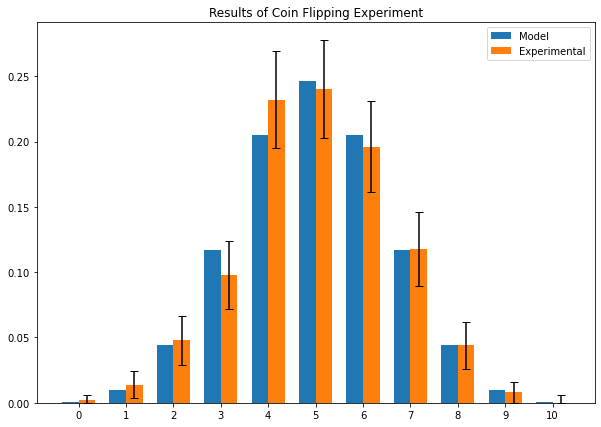

In [44]:
# swiped from: https://matplotlib.org/examples/api/barchart_demo.html
width = 0.35 
mpl.rcParams["errorbar.capsize"] = 4     
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(heads, binomial_pmf, width)
rects2 = ax.bar(heads+width, p_hat, width, yerr=MOE)
ax.set_xticks(heads + width / 2)
ax.set_xticklabels(heads)
ax.set_title('Results of Coin Flipping Experiment')
ax.legend((rects1[0], rects2[0]), ('Model', 'Experimental'))